# Random Forests

In [3]:
# imports
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings
warnings.filterwarnings('ignore')

In [4]:
# reading the dataframes
df = pd.read_csv('df.csv')
df_20 = pd.read_csv('df_20.csv')

In [5]:
# functions
def data_split(d, t):
    test = d[d.year_week.isin(t)]
    train = d[~d.year_week.isin(t)]
    test.drop(['Weekly_Sales'], axis=1, inplace=True)
    train.drop(['Weekly_Sales'], axis=1, inplace=True)
    X_test = test.drop('Weekly_Sales_log', axis=1)
    y_test = test['Weekly_Sales_log']
    X_train = train.drop('Weekly_Sales_log', axis=1)
    y_train = train['Weekly_Sales_log']
    return X_test, y_test, X_train, y_train

def vis(y_test, y_pred, X_test):
    y = pd.DataFrame(X_test[:], columns=['test', 'pred'])
    y['test'] = np.expm1(y_test)
    y['pred'] = np.expm1(y_pred)
    ax = y.plot(figsize=(10,5),title="Model's Prediction Performance")
    ax.set_xlabel('data row id')
    ax.set_ylabel('weekly sales')
    ax

def accuracy(X_test,y_test, y_pred):
    print('accuracy (R^2):\n', model.score(X_test, y_test)*100, '%')

accuracy (R^2):
 94.99227088334943 %

 out of bag score:
  0.9723222891634283

 feature importances:
  [5.53750435e-02 7.14670269e-01 5.53425301e-04 1.94702228e-02
 8.68726135e-03 6.71909255e-03 1.63734710e-02 1.00674443e-02
 1.27902928e-01 2.81417176e-02 1.20391249e-02]


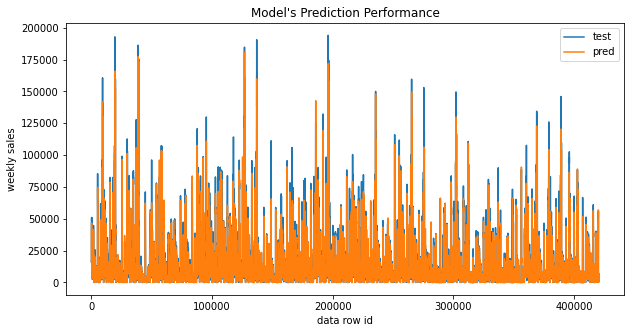

In [6]:
# Random Forest Regressor model -- all stores
X_test, y_test, X_train, y_train = data_split(df, np.linspace(201230, 201243))
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

Notes:

* criterion='mae' requires a lot more computation -> overloads the CPU
* features in order of importance: Dept, Size_log, Store, week, Type, CPI, year_week, Unemployment, Temperature, Fuel_Price, IsHoliday

# Backward Feature Elimination

accuracy (R^2):
 94.97090400659616 %

 out of bag score:
  0.9722293583515869

 feature importances:
  [0.05534372 0.714658   0.01690117 0.00877883 0.00678294 0.01640173
 0.01006121 0.13052661 0.02852636 0.01201941]


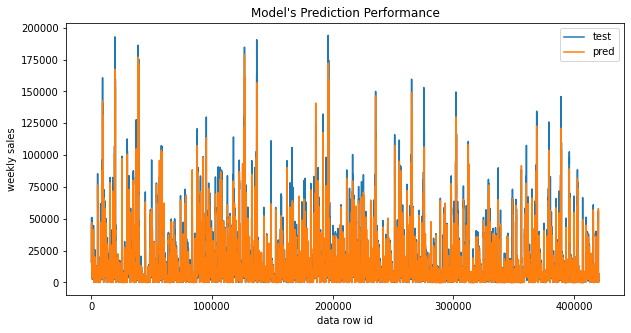

In [8]:
# Random Forest Regressor model -- all stores -- removing IsHoliday
X_test.drop(['IsHoliday'], axis=1, inplace=True)
X_train.drop(['IsHoliday'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

accuracy (R^2):
 94.71733404319009 %

 out of bag score:
  0.9724884767927421

 feature importances:
  [0.05566003 0.71456732 0.01689675 0.00985652 0.01766098 0.01044642
 0.13059068 0.02987198 0.01444931]


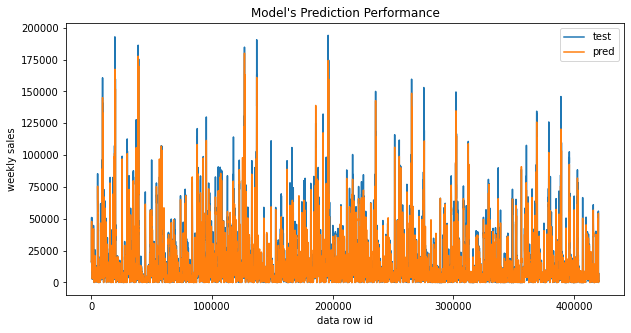

In [9]:
# Random Forest Regressor model -- all stores -- removing Fuel_Price
X_test.drop(['Fuel_Price'], axis=1, inplace=True)
X_train.drop(['Fuel_Price'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

accuracy (R^2):
 94.40020079834622 %

 out of bag score:
  0.9729735288552814

 feature importances:
  [0.05641448 0.71467754 0.01563596 0.01999302 0.01097512 0.13220783
 0.03374391 0.01635215]


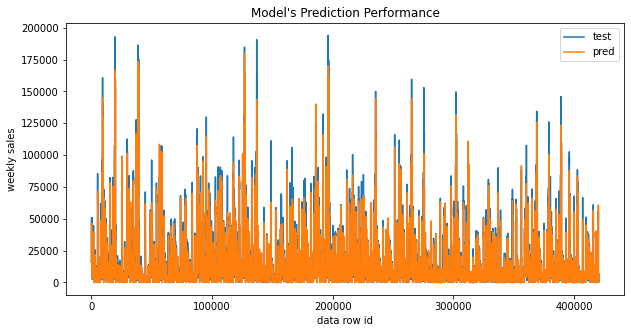

In [10]:
# Random Forest Regressor model -- all stores -- removing Temperature
X_test.drop(['Temperature'], axis=1, inplace=True)
X_train.drop(['Temperature'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

accuracy (R^2):
 94.50705760400933 %

 out of bag score:
  0.9730379522396838

 feature importances:
  [0.05948377 0.71497967 0.01692252 0.02242251 0.13477411 0.03421949
 0.01719794]


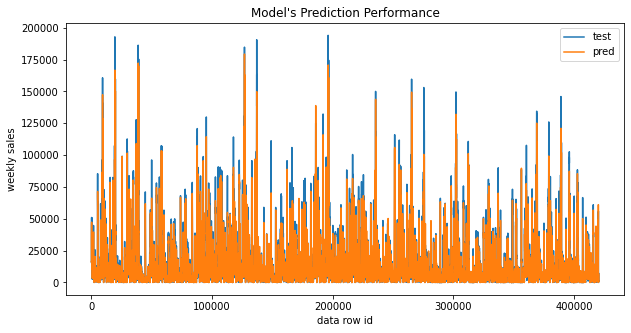

In [11]:
# Random Forest Regressor model -- all stores -- removing Unemployment
X_test.drop(['Unemployment'], axis=1, inplace=True)
X_train.drop(['Unemployment'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

accuracy (R^2):
 95.34039325351117 %

 out of bag score:
  0.9708676261479164

 feature importances:
  [0.05900591 0.71463706 0.0169638  0.03441146 0.13541258 0.03956919]


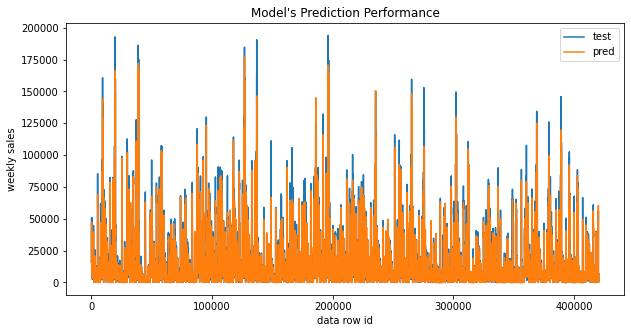

In [12]:
# Random Forest Regressor model -- all stores -- removing year_week
X_test.drop(['year_week'], axis=1, inplace=True)
X_train.drop(['year_week'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

accuracy (R^2):
 93.3094896735744 %

 out of bag score:
  0.9402285686453128

 feature importances:
  [0.06611893 0.72461054 0.0157364  0.14463547 0.04889867]


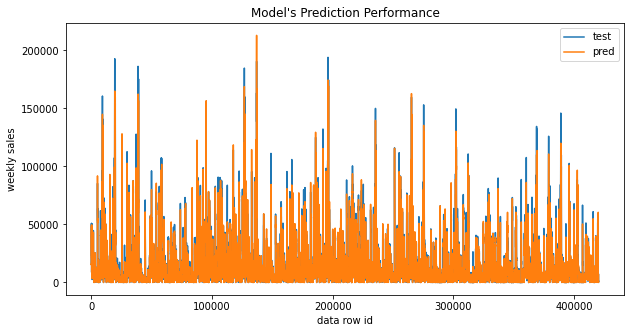

In [13]:
# Random Forest Regressor model -- all stores -- removing CPI
X_test.drop(['CPI'], axis=1, inplace=True)
X_train.drop(['CPI'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

accuracy (R^2):
 93.30947484264571 %

 out of bag score:
  0.940210071144593

 feature importances:
  [0.069314   0.72449826 0.1572788  0.04890895]


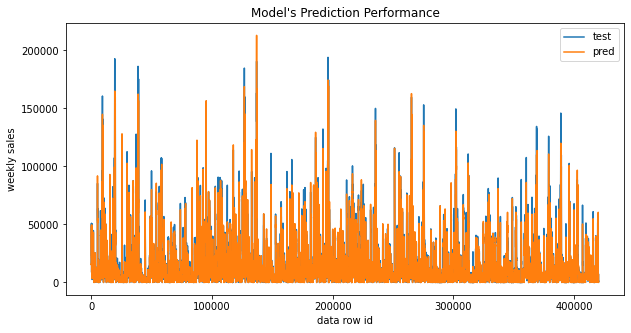

In [14]:
# Random Forest Regressor model -- all stores -- removing Type
X_test.drop(['Type'], axis=1, inplace=True)
X_train.drop(['Type'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

accuracy (R^2):
 92.00789014701866 %

 out of bag score:
  0.9158842012972945

 feature importances:
  [0.07108887 0.76506567 0.16384546]


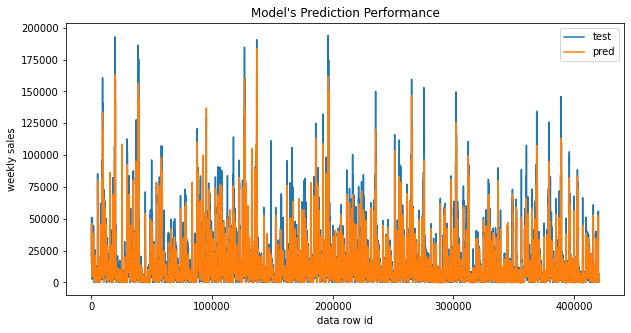

In [15]:
# Random Forest Regressor model -- all stores -- removing week
X_test.drop(['week'], axis=1, inplace=True)
X_train.drop(['week'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

accuracy (R^2):
 91.53893538444908 %

 out of bag score:
  0.9097467004084632

 feature importances:
  [0.77017082 0.22982918]


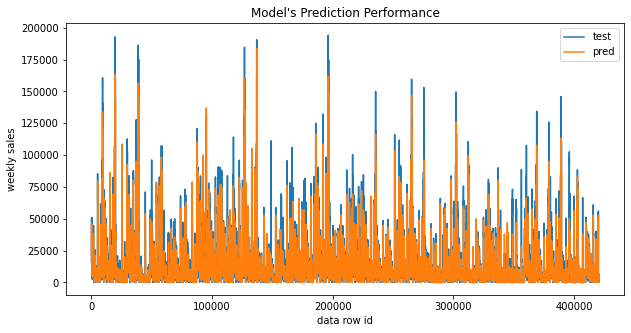

In [16]:
# Random Forest Regressor model -- all stores -- removing Store
X_test.drop(['Store'], axis=1, inplace=True)
X_train.drop(['Store'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

accuracy (R^2):
 49.99282056569344 %

 out of bag score:
  0.504336852470579

 feature importances:
  [1.]


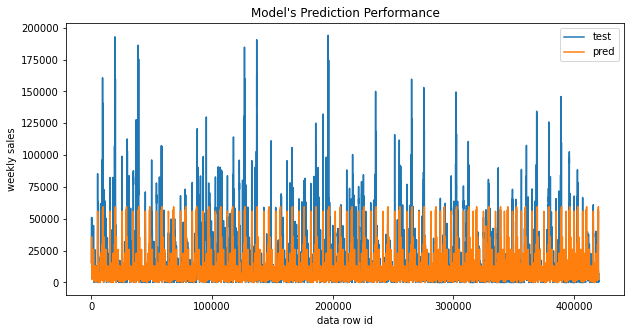

In [17]:
# Random Forest Regressor model -- all stores -- removing Size_log
X_test.drop(['Size_log'], axis=1, inplace=True)
X_train.drop(['Size_log'], axis=1, inplace=True)
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)

accuracy (R^2):
 20.321444753097595 %

 out of bag score:
  0.2008659444242613

 feature importances:
  [0.0631944  0.06142028 0.06873783 0.08700735 0.00911358 0.01087715
 0.69964942]


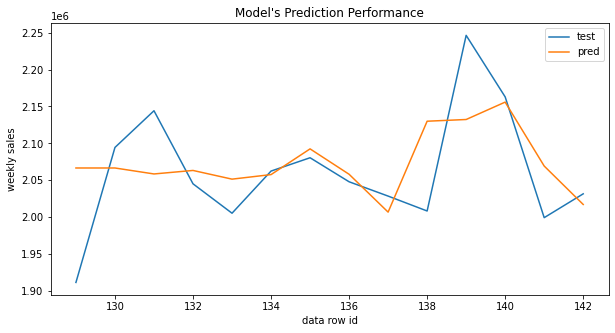

In [18]:
# Random Forest Regressor model -- store 20
X_test, y_test, X_train, y_train = data_split(df_20, np.linspace(201230, 201243))
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1,
                              random_state=100, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# performance
accuracy(X_test, y_test, y_pred)
print('\n out of bag score:\n ', model.oob_score_)
print('\n feature importances:\n ', model.feature_importances_)
vis(y_test, y_pred, X_test)